In [1]:
import bioformats as bf

In [2]:
#Import python modules
import falsecolor.coloring as fc
from falsecolor.process import ViewImage
import numpy as np
import os
import h5py as h5
import bioformats as bf

In [8]:
import sys
sys.path.append("C:\\Users\\bnort\\work\\ImageJ2022\\tnia\\tnia-python\\tnia\\io")
import bioformats_helper

In [4]:
from ipyfilechooser import FileChooser

In [5]:
# Create and display a FileChooser widget
filechooser = FileChooser('D:\\elephasbio\\')
display(filechooser)

FileChooser(path='D:\elephasbio', filename='', title='HTML(value='', layout=Layout(display='none'))', show_hid…

In [11]:
# Print the selected file
print(filechooser.selected_filename)

Deconvolved.tif


In [11]:
filename = "D:\elephasbio\deconvolved\Deconvolved.tif"
#filename = filechooser.selected
bioformats_helper.start_jvm();

meta = bf.get_omexml_metadata(filename);
o=bf.OMEXML(meta);
nz=o.image().Pixels.SizeZ
nuclei=bioformats_helper.load_channel(filename,nz,0)
cyto=bioformats_helper.load_channel(filename,nz,1)




read slice 1



read slice 2



read slice 3



read slice 4



read slice 5



read slice 6



read slice 7



read slice 8



read slice 9



read slice 10



read slice 11



read slice 12



read slice 13



read slice 14



read slice 15



read slice 16



read slice 17



read slice 18



read slice 19



read slice 20



read slice 21



read slice 22



read slice 23



read slice 24



read slice 25



read slice 26



read slice 27



read slice 28



read slice 29



read slice 30



read slice 31



read slice 32



read slice 33



read slice 34



read slice 35



read slice 36



read slice 37



read slice 38



read slice 39



read slice 40



read slice 41



read slice 42



read slice 43



read slice 44



read slice 45



read slice 46



read slice 1



read slice 2



read slice 3



read slice 4



read slice 5



read slice 6



read slice 7



read slice 8



read slice 9



read slice 10



read slice 11



read slice 12



read slice 13



read slice 1

(<Figure size 720x720 with 1 Axes>, <AxesSubplot:title={'center':'Eosin'}>)

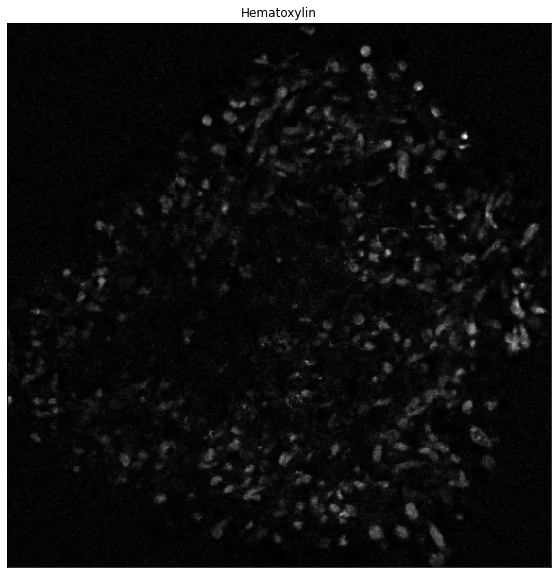

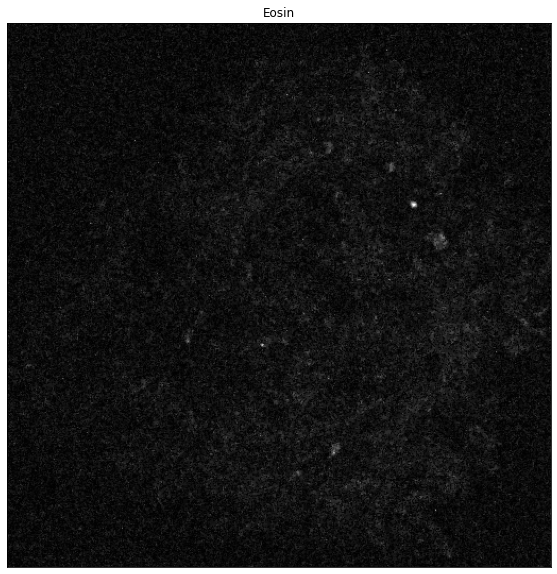

In [12]:
#View Raw Data from nuclear/cytoplasmic channels
z=int(nz/2)
ViewImage(nuclei[z], figsize = (10,10), cmap = 'gray', title = 'Hematoxylin')
ViewImage(cyto[z], figsize = (10,10), cmap = 'gray', title = 'Eosin')

(<Figure size 864x864 with 1 Axes>,
 <AxesSubplot:title={'center':'Virtual H&E'}>)

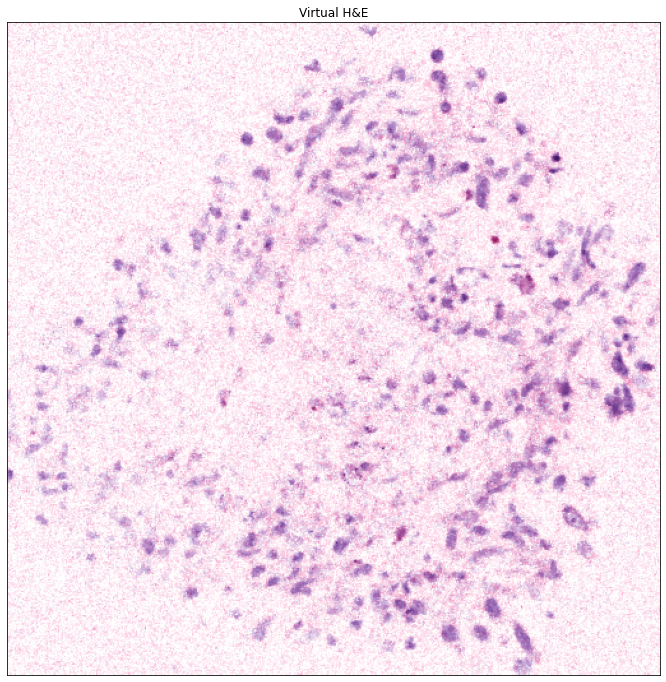

In [13]:
nuc_background = fc.getBackgroundLevels(nuclei[z])[1]
cyto_background = fc.getBackgroundLevels(cyto[z])[1]

pseudo_image = fc.falseColor(nuclei[z], cyto[z], nuc_threshold=nuc_background, cyto_threshold=cyto_background)
ViewImage(pseudo_image, figsize = (12,12), title = 'Virtual H&E')